In [ ]:
import sklearn

In [2]:
from sklearn.datasets import load_iris

In [7]:
a = load_iris()


In [16]:
#Load the MNIST Dataset
from keras.datasets import mnist


In [41]:
#split the dataset
(x_train,y_train), (x_test,y_test) = mnist.load_data()

In [42]:
#Preprocess the data (Normalize/flatten)
x_train , x_test = x_train/255.0 , x_test/255.0

nsamples, nx, ny = x_train.shape
x_train = x_train.reshape((nsamples,nx*ny))

nsamples, nx, ny = x_test.shape
x_test = x_test.reshape((nsamples,nx*ny))



In [43]:
#print( y_train.shape)
#nsamples, nx, ny = y_train.shape
#y_train = y_train.reshape((nsamples,nx*ny))

In [44]:
#one hot encode
#from keras.utils import to_categorical
#y_train = to_categorical(y_train, 10)
#y_test = to_categorical(y_test, 10)

In [45]:
# Implement a supervised learning algo : Random Forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV, train_test_split
rf = RandomForestClassifier()
rf.fit(x_train, y_train)

RandomForestClassifier()

In [46]:
y_pred = rf.predict(x_test)


In [48]:
#Evaluate
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9704


In [51]:
#Implement un supervised algo : KMeans
import numpy as np
from sklearn.cluster import KMeans


In [52]:
# Initialize KMeans model
num_clusters = len(np.unique(y_train))
kmeans = KMeans(n_clusters=num_clusters, random_state=42)

# Fit KMeans model to the training data
kmeans.fit(x_train)

# Predict cluster labels for the test data
cluster_labels = kmeans.predict(x_test)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [53]:
# Map cluster labels to the most common digit label in each cluster
cluster_to_label = {}
for cluster in range(num_clusters):
    cluster_indices = np.where(kmeans.labels_ == cluster)[0]
    cluster_digit_labels = y_train[cluster_indices]
    most_common_label = np.bincount(cluster_digit_labels).argmax()
    cluster_to_label[cluster] = most_common_label

# Map cluster labels to digit labels for the test data
predicted_labels = [cluster_to_label[cluster] for cluster in cluster_labels]

# Calculate accuracy
accuracy = accuracy_score(y_test, predicted_labels)
print("Accuracy:", accuracy)

Accuracy: 0.5943


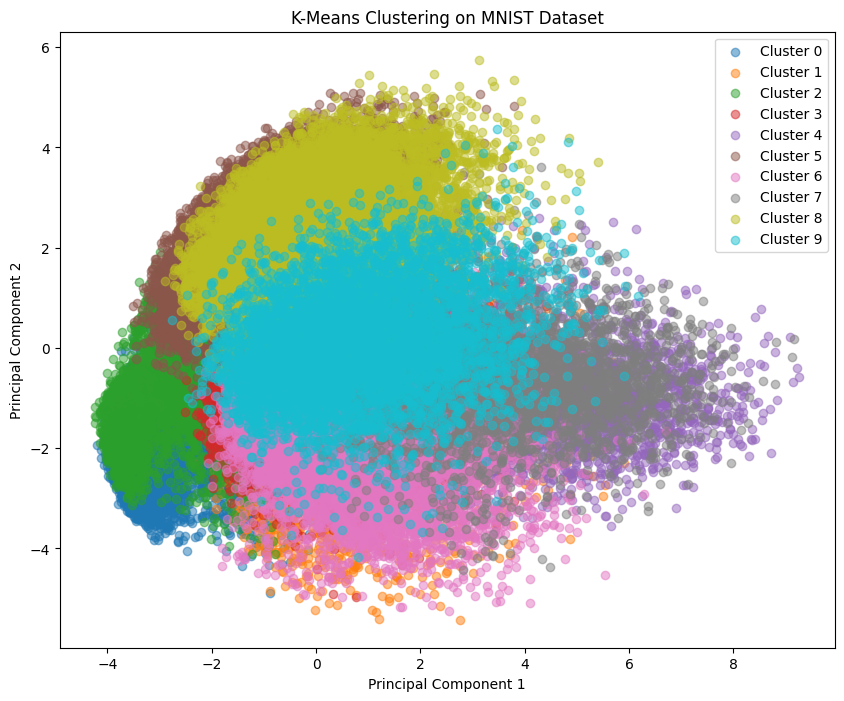

In [54]:
# Reduce dimensionality using PCA
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=2)
x_train_pca = pca.fit_transform(x_train)

# Plotting the clusters
plt.figure(figsize=(10, 8))
for i in range(num_clusters):
    cluster_indices = np.where(kmeans.labels_ == i)[0]
    plt.scatter(x_train_pca[cluster_indices, 0], x_train_pca[cluster_indices, 1], label=f'Cluster {i}', alpha=0.5)

plt.title('K-Means Clustering on MNIST Dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()